In [2]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
kmeans.cluster_centers_

c:\Users\casey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([[10.,  2.],
       [ 1.,  2.]])

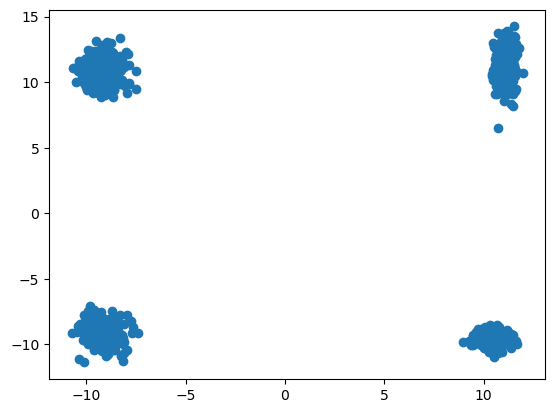

In [3]:
import matplotlib.pyplot as plt

def genData(N, m, focusPts):
    musig = np.random.rand(2, m) + 0.2
    dists = np.zeros(shape=(2, N*m))
    for i in range(m):
        dists[0, (i*N):((i+1)*N)] = np.random.normal(musig[0, i], musig[1, i], size=(1, N)) + np.full(N, focusPts[i, :][0])
        dists[1, (i*N):((i+1)*N)] = np.random.normal(musig[0, i], musig[0, i], size=(1, N)) + np.full(N, focusPts[i, :][1])
    return dists

m = 4
N = 300
trials = 50
fnum = 1

focusPts = np.array([[10, 10], [-10, 10], [-10, -10], [10, -10]])
dists = genData(N, m, focusPts)

plt.plot(dists[0, :], dists[1, :], 'o')
plt.show()

In [4]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(dists.T)
print(kmeans.cluster_centers_)

[[-9.1560423  -9.10146964]
 [-9.18309879 10.88317637]
 [11.13524563 11.17724127]
 [10.41501728 -9.57039868]]


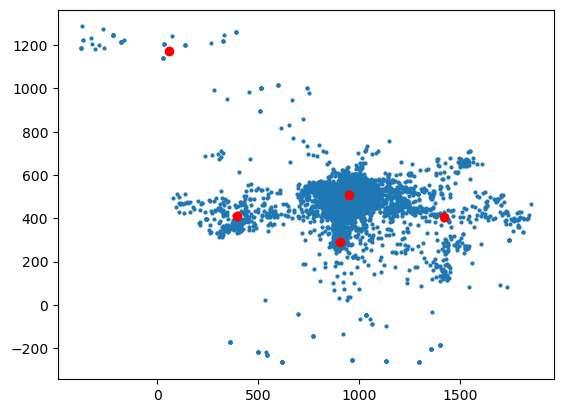

[[1003.17144775  484.25991821]
 [1383.9720459   299.69064331]
 [1030.58300781  393.58331299]
 ...
 [ 901.91827393  312.10586548]
 [ 901.20733643  310.6963501 ]
 [ 902.75744629  301.30419922]]


In [5]:
import pandas
data = pandas.read_csv('E008.csv').to_numpy()

validData = np.zeros(shape=(int(sum(data[:, 3])), 6))

j = 0
for i in range(len(data[:, 0])):
    if data[i, 3] == 1:
        validData[j, :] = data[i, :]
        j= j + 1


kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(validData[:, 4:])

plt.plot(data[:, 4], data[:, 5], 'o', markersize=2)
plt.plot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 'o', color='red')
plt.show()

print(validData[:, 4:])

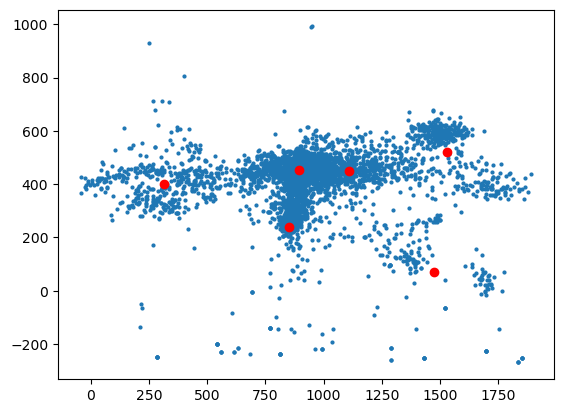

[[ 315.83035449  400.98565957]
 [1110.63468737  450.0246157 ]
 [1474.45264683   72.15235928]
 [1530.519623    520.75455778]
 [ 851.95157004  239.64354296]
 [ 893.4066859   452.08474565]]


In [8]:
import pandas
data = pandas.read_csv('E057.csv').to_numpy()

validData = np.zeros(shape=(int(sum(data[:, 3])), 6))

j = 0
for i in range(len(data[:, 0])):
    if data[i, 3] == 1:
        validData[j, :] = data[i, :]
        j= j + 1


kmeans = KMeans(n_clusters=6, random_state=0, n_init="auto").fit(validData[:, 4:])

plt.plot(data[:, 4], data[:, 5], 'o', markersize=2)
plt.plot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 'o', color='red')
plt.show()

print(kmeans.cluster_centers_)